<a href="https://colab.research.google.com/github/ninoc0/Research/blob/main/Bode_Plots_of_RLC_Circuit.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**In this project, we will graph and understand the bode plots of a series RLC circuit.**
This project is best viewed on [Google Colaboratory](https://colab.research.google.com/drive/1oH9CbiHUOjwKHZz1htCmLJlPnEDvaZry?usp=sharing).

# 1. Setup


## 1.1 Importing Libraries

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import math
from scipy import signal

## 1.2 Defining the Resistance, Capacitance, and Inductanc

In [ ]:
# 1.2. Defining the Resistance, Capacitance, and Inductance
#@title Defining the Resistance, Capacitance, and Inductance

#Frequency Minimum (in Hz)
f_min = 1 #@param{type: "slider", min: 1, max: 100, step: 10}

#Frequency Maximum(in Hz)
f_max = 1000000 #@param{type: "slider", min: 1000, max: 1000000, step: 10000}

#Define an array of frequency in Hz
f_values = np.linspace(f_min, f_max, 100)

#Resistance (in Ohms)
R = 100 #@param {type:"slider", min: 100, max: 10000, step:100}

#Capacitance (in Farads)
C = 0.000001 #@param {type:"slider", min: 0.000001, max:1, step:0.01}

#Inductance (in Henrys)
L = 0.1 #@param {type:"slider", min:0.01, max:10, step:0.1}

#Empty List to store V_out/V_in
Vout_Vin_ratios = []

# 2. Deriving Equations

## 2.1 Sketching an RLC Circuit

[//]: # "2.1. Sketching an RLC Circuit"
We should first start by understanding the components and purpose of an RLC circuit. An RLC circuit is used to amplify(or reject) a specific frequency(or range of frequencies). This is achieved by using capacitors and inductors to cancel each other out at certain frequences. This causes resonance to occur such that the current will peak in voltage at that frequency.
This current could look something like:
<p align=center>
    This current could look something like:
</p>
<p align=center>
    <img src="https://drive.google.com/uc?export=view&id=1KYSvHCkuviXl2ufzi29hfM0vOvHh1wxW" width="400" height="320">
</p>


Some given equations we should know are:
\begin{equation*}
    Z_R = R \\
    Z_L = j2\pi fL \\
    Z_C = \frac{1}{j2\pi fC}
\end{equation*}
where: \\
<p align=center>
    $j$ = the phase shift between current and voltage
</p>
<p align=center>
    $f$ = the frequency in Hz
</p>
<p align=center>
    $Z$ = the impedance
</p>


## 2.2 Solving for $\frac{V_{out}}{V_{in}}$

[//]: # "Solving for $\frac{V_{out}}{V_{in}}$"
The first part we want to solve for is the total impedance or $Z_T$.
\begin{equation*}
    Z_T = Z_R + Z_L + Z_C \\
    Z_T = R + j2\pi fL + \frac{1}{j2\pi fC}
\end{equation*}
Since we know that

\begin{equation*}
    V_{out} = V_{in} \frac{Z_C}{Z_T+Z_C}
\end{equation*}
from the voltage divider rule. We can say that $V_{out}$ is
\begin{equation*}
    V_{out} = V_{in} \frac{\frac{1}{j2\pi fC}}{R+j2\pi fL+\frac{2}{j2\pi fC}}\\
    V_{out} = V_{in} \frac{1}{(j2\pi fC)(R+j2\pi fL+\frac{2}{j2\pi fC})}
\end{equation*}
We are looking for $\frac{V_{out}}{V_{in}}$ so we can solve:
\begin{equation*}
    \frac{V_{out}}{V_{in}} = (j2\pi fC)(R+j2\pi fL+\frac{2}{j2\pi fC})\\
    \frac{V_{out}}{V_{in}} = 2\pi jfCR + 4 (jf\pi)^2CL + 2
\end{equation*}


## 2.3 Understanding Bode Plots

[//]: # "Understanding Bode Plots"
Bode plots are a set of graphs which shows how a system will change with respect to a given input frequency. It consists of one magnitude plot and one phase plot.
<br>
<br>
In an RLC circuit, the magnitude refers to the ratio of the amplitude of the output vs the input. In mathematical terms this can be written as $\frac{A_{out}}{A_{in}}$. Due to the large output value of this equation, we use decibels(dB) to denote magnitude. When converting from bode magnitude to linear mangitude, which does not have a designated unit, you can use the following equation:
\begin{equation*}
    linear magnitude = 10^({\frac{bode magnitude}{20}})
\end{equation*}
Phase represents the phase shift between the output and input voltage. This can provide information on how the output is delaying or adavancing based on the input voltage and has the unit of degrees.
<br><br>
In order to create bode plots, we must first understand transfer functions.

## 2.4 Transfer Functions

Transfer functions, denoted as $H(s)$ is the ratio of an output to an input. While similar to the $\frac{V_{out}}{V_{in}}$ we solved for before, transfer functions are functions of time. We can begin with the following given values.
\begin{equation*}
    V_R = RI \\
    V_C = \frac{1}{C}\int Idt \\
    V_L = L\frac{dI}{dt}
\end{equation*}
The reasons we know these equations are due to the fundamental relationships between voltage and the given circuit component. The variable $I$ represents the current flow, meaning that $\int Idt$ represents the integral of current and $\frac{dI}{dt}$ is the rate of change of the current.
<br>
<br>
We know that $V_{in}$ must be equal to $V_{total}$ due to Kirchhoff's voltage law. Furthermore, we can assume that $V_{out}$ is equal to $V_R$ since the RLC circuit we drew is in a series.
<br>
<br>
One last component we need to understand is the Laplace Transform. This is a technique to transform functions of time(such as the ones above) into functions of complex frequency domain(of $s$, where $s=jw$). This allows us to derive the following equations.
\begin{equation*}
    V_R = RI(s) \\
    V_C = \frac{1}{Cs}I(s) \\
    V_L = LsI(s)
\end{equation*}
Using this we can find $H(s)$:
\begin{equation*}
    V_{in}(s) = RI(s) + LsI(s) + \frac{1}{Cs}I(s) \\
    H(s) = \frac{V_{out}}{V_{in}} \\
    H(s) = \frac{R}{R+Ls+\frac{1}{CS}} \\
    H(s) = \frac{1}{s^2LC + sRC + 1}
\end{equation*}

# 3. Graphing the Results

## 3.1 Graphing Magnitude


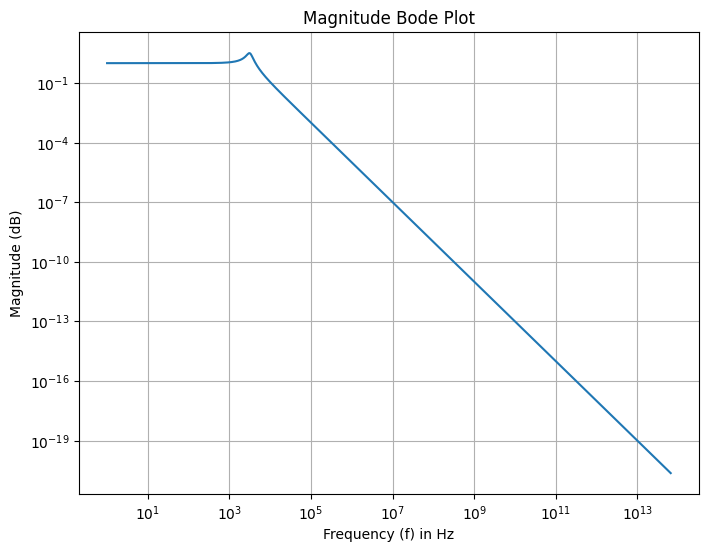

In [ ]:
# 3.1. Graphing Magnitude
#@title Graphing Magnitude

f_values = np.logspace(np.log(f_min), np.log(f_max), 1000)  # Logarithmic scale

# Define the transfer function for the RLC circuit
numerator = [1]
denominator = [L * C, R * C, 1] #the s is implied in the signal library
system = signal.TransferFunction(numerator, denominator)

# Compute the magnitude and phase using scipy.signal.bode
w, magnitude_db, phase_degrees = signal.bode(system, f_values)

# Convert magnitude to a linear scale
magnitude_linear = 10**(magnitude_db / 20)  # Convert from dB to linear scale

# Plotting the data
plt.figure(figsize=(8, 6))

# Magnitude plot
plt.loglog(w, magnitude_linear)  # Use loglog for a log plot
plt.title('Magnitude Bode Plot')
plt.xlabel('Frequency (f) in Hz')
plt.ylabel('Magnitude (dB)')
plt.grid(True)


## 3.2 Graphing Phase

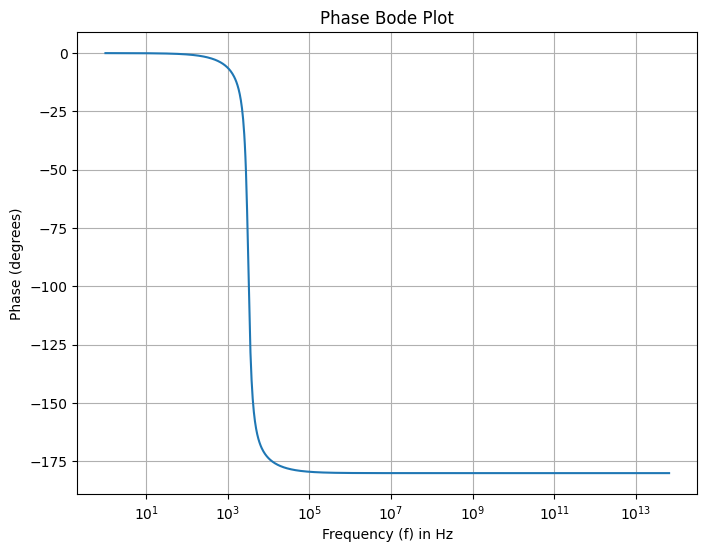

In [ ]:
# 3.2. Graphing Phase
#@title Graphing Phase
# Create phase (degrees) Bode plot
plt.figure(figsize=(8, 6))
plt.semilogx(w, phase_degrees)
plt.title('Phase Bode Plot')
plt.xlabel('Frequency (f) in Hz')
plt.ylabel('Phase (degrees)')
plt.grid(True)

plt.show()
